# Cluster clients that use our telecom services similarly.

#### 1 - Customer Segmentation.


In [1]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv(
    "../../DATA/TELECOM.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

print(
    f"Shape (observations, features):\n{df.shape}"
)

print(
    f"\nMissing Values:\n{df.isnull().sum()}"
)

Dataset:
   Calls  Intern    Text  Data  Age
0   1.12    0.19   23.92  0.18   60
1   1.08    0.22   17.76  0.23   54
2   3.54    0.26  289.79  1.99   34
3   1.09    0.21   19.15  0.21   61
4   1.04    0.24   20.33  0.20   56

Shape (observations, features):
(1000, 5)

Missing Values:
Calls     0
Intern    0
Text      0
Data      0
Age       0
dtype: int64


- Calls: Average number of hours of polling per month.
- Intern: Average number of hours spend in international phone calls per month.
- Text: Average number of text messages sent by user per month.
- Data: Average data usage in Gigabytes per month.
- Age: Age of the user of the line in years.

In [2]:
df.describe()

,Calls,Intern,Text,Data,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.629930,0.404840,225.021570,1.964750,37.776000
std,1.516563,0.377571,213.821509,1.374458,16.195311
min,0.850000,0.090000,17.010000,0.170000,12.000000
25%,1.490000,0.110000,20.770000,0.520000,24.000000
50%,2.040000,0.220000,190.525000,1.980000,35.000000
75%,3.492500,0.790000,449.437500,2.902500,51.000000
max,6.000000,1.200000,598.940000,4.790000,72.000000


Variables are in very different scales.

In [3]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Get a scaler object
scaler = MinMaxScaler()

# the scale function subtracts the mean and divides by the standard deviation of your variable

# Create a new dataframe for the scaled values
df_2_normalized = df.copy()

# Normalize the numeric columns
df_normalized = scaler.fit_transform(df_2_normalized)

df_n = pd.DataFrame(df_normalized, columns=df.columns)
df_n.head(2)

,Calls,Intern,Text,Data,Age
0,0.052427,0.090090,0.011874,0.002165,0.8
1,0.044660,0.117117,0.001289,0.012987,0.7


## Visualize high-dimensional data - How many clusters?

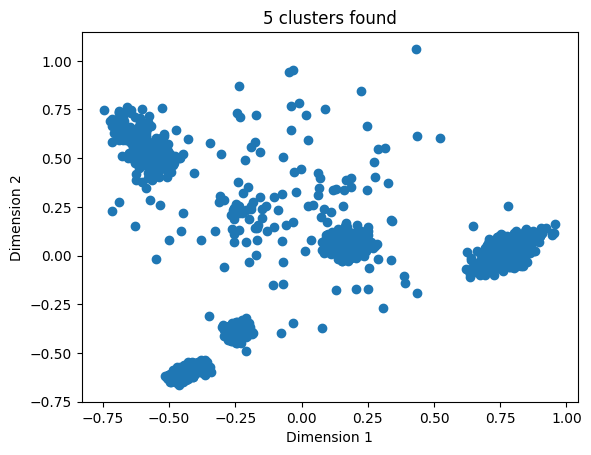

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df_n)
features_2d = pca.transform(df_n)

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('5 clusters found')
plt.show()

### Run proper clustering approach

In [5]:
from sklearn.cluster import AgglomerativeClustering
df_clustered = AgglomerativeClustering(n_clusters=5).fit(df_n)

In [6]:
import joblib

# Save the model as a pickle file
filename = '../../models/Telecom_Customer_Similarity.pkl'
joblib.dump(df_clustered, filename)


['../../models/Telecom_Customer_Similarity.pkl']

### Make Business Decision and Visualize the data

In [7]:
df["group"] = df_clustered.labels_

informative_table = df.groupby(df.group)[df.columns].mean().drop("group", axis = 1)

print(
    f"After clustering, we can observe the mean features corresponding to each group:\n\n{informative_table}"
)


After clustering, we can observe the mean features corresponding to each group:

          Calls    Intern        Text      Data        Age
group                                                     
0      1.431399  0.172133   21.043951  0.309056  52.678322
1      1.708617  0.103597  510.996047  3.733676  18.956522
2      2.514227  0.873711  266.688041  2.144227  41.030928
3      5.142500  1.022174   30.044783  2.014185  45.190217
4      3.323167  0.314278  324.022333  1.961889  31.216667


#### Individual Plots

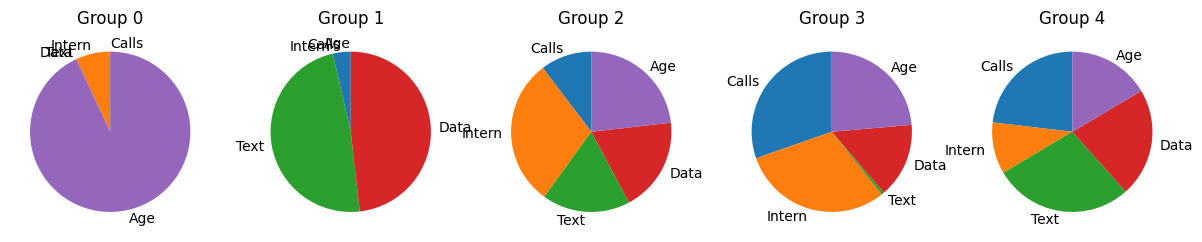

In [41]:
scaled_informative_table = scaler.fit_transform(informative_table)
categories =  informative_table.columns

fig, axs = plt.subplots(1, 5, figsize=(15,10))
for cat, row in enumerate(scaled_informative_table): 
  ax = axs[cat]
  ax.pie(row, labels = categories, startangle = 90)
  ax.set_title(f"Group {cat}")

plt.show() 

#### All together scaled

In [9]:
import plotly.graph_objects as go

fig = go.Figure()

# Attributes
categories = informative_table.columns

scaled_informative_table = scaler.fit_transform(informative_table)

for group, col in zip(informative_table.index, scaled_informative_table):

    fig.add_trace(go.Scatterpolar(
        r=col,
        theta=categories,
        fill='toself',
        name=group
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)

fig.show()

![Alt text](../../figures/telecom.png)

## Marketing Decisions - Post analysis
* At first glance we can see that people younger than 35 years old rely highly on Text messages.
* At the same time, only 1 group seems to use International Phone Calls regularly. Focus on this group for International Calls and Data offers.
- Group 0 ( BLUE ): **Older people, use only calls:** Offer a plan focused on unlimited phone calls where Text and Data are not included or limited.
- Group 1 ( RED ): **Text and Data:** Offer a plan based on unlimited Text and Data, but limited calls.
- Group 2 ( GREEN ): **Older Misc:** Offer same plan as Group 0 + International Calls.
- Group 3 ( PURPLE ): **Poolling and no Text:** Offer plan with unlimited calls and data, but limited Text messages.
- Group 4 ( ORANGE ): **Misc:** Standard plan, this group uses all phone's capabilities and is young. Offer a phone paid monthly with the standard plan.

